In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
dataset = pd.read_csv("C:\\Users\\Akanksha\\Downloads\\sledata.txt", sep = " ", header = None)

columns = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','D']
dataset.columns = columns
dataset['D'] = dataset['D'].astype('string')
dataset

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,D
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,0,0,0,1,0,0,0,1,1,1,2
296,1,0,1,1,0,0,0,0,1,1,1,2
297,0,0,0,1,1,1,0,0,0,1,1,2
298,1,0,1,0,1,1,1,1,0,1,1,2


In [3]:
X = dataset[['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11']].values
X[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [4]:
y = dataset["D"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: D, dtype: string

In [5]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [6]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (210, 11) &  Size of Y training set (210,)


In [7]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (90, 11) &  Size of Y training set (90,)


In [21]:
tree1 = DecisionTreeClassifier(criterion="gini",max_depth=3)
tree1 # it shows the default parameters

DecisionTreeClassifier(max_depth=3)

In [22]:
tree1.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=3)

In [23]:
predTree = tree1.predict(X_testset)

In [104]:
print (predTree [0:5])
print (y_testset [0:5])


['1' '2' '2' '2' '1']
84     1
217    2
211    2
286    2
31     1
Name: D, dtype: string


In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9444444444444444


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_testset, predTree))
print(classification_report(y_testset, predTree))

[[49  0]
 [ 5 36]]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        49
           2       1.00      0.88      0.94        41

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



In [19]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [65]:
cross_val_score(tree1, X_trainset, y_trainset, cv=7)

array([1.        , 0.93333333, 0.9       , 0.96666667, 0.93333333,
       0.93333333, 0.96666667])

In [73]:
tree1.feature_importances_

array([0.06469504, 0.00618763, 0.02555059, 0.02206759, 0.00100717,
       0.03682552, 0.01283933, 0.01746896, 0.02773586, 0.67894583,
       0.1066765 ])

In [26]:
print("Depth of the Decision tree is:",tree1.tree_.max_depth)
print("Total number of nodes in the tree are",tree1.tree_.node_count)

Depth of the Decision tree is: 3
Total number of nodes in the tree are 13


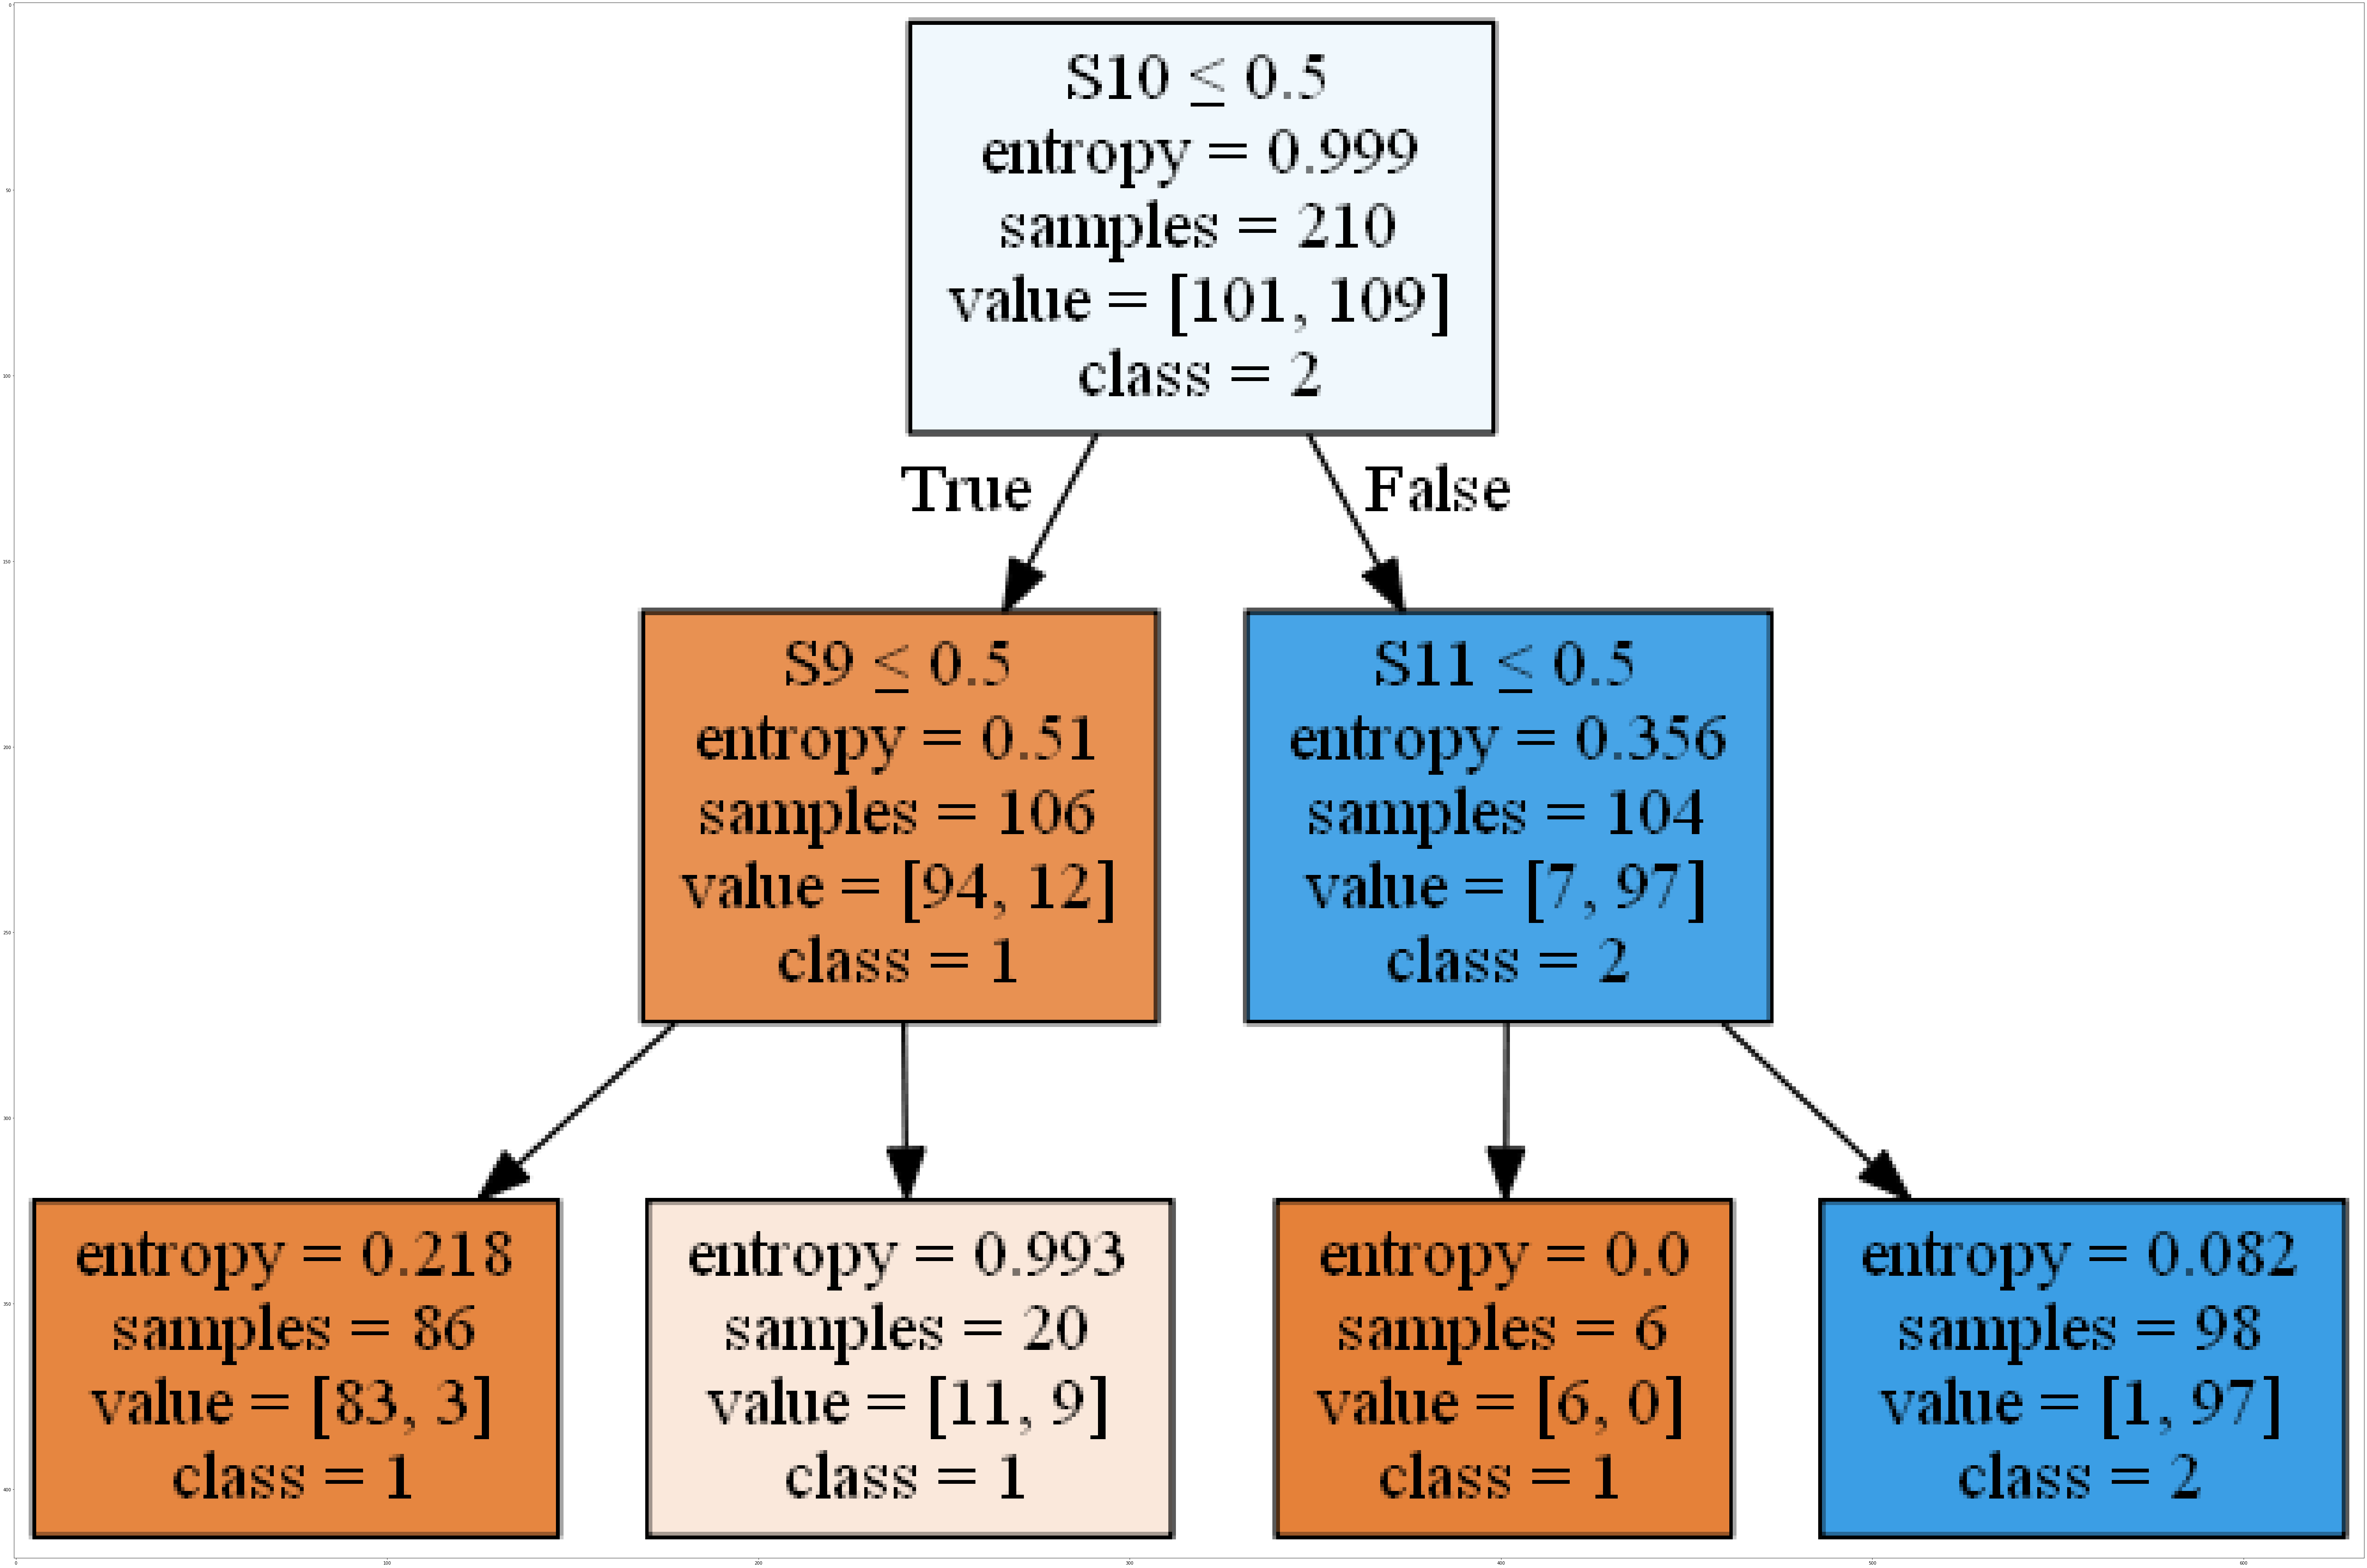

In [29]:
dot_data = StringIO()
filename = "tree.png"
featureNames = dataset.columns[0:11]
targetNames = dataset['D'].unique()
out=tree.export_graphviz(tree1,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')